Adam Peetz <br>
MSDS 650 <br>
Regis University <br>

# Machine Learning: Bank Marketing 

The bank marketing dataset is a dataset provided by Moro et al in 2014.  The binary classification goal of this dataset is to predict if the client will subscribe for a bank account, as shown by variable "y" in the dataset. There are over 41000 entries in the dataset with 20 different features. These features can be broken into three different categories. The first describes the bank customer, attributes like their education and age or what type of bank products they have used in the past (loans). The second is campaign information, it represents the customer contact details for current and previous campaigns, things like time since the last contact and duration of the phone call. The final category is financial market information, these fields describe the health of the financial market at the time of contact. <br>

This notebook contains a machine learning application that will predict if a customer will sign up for a bank account, as indicated by an entry of yes or no in feature 'y' of the dataset.

In [61]:
#load required libraries:
# pandas
import pandas as pd

#data preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

#Comparison Algorythm Imports:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error

from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")

In [62]:
#create df from csv
bank_df = pd.read_csv('assign_wk5/bank-additional-full.csv',delimiter=';')

<b> Requirement: Clean the data </b>

<b> Requirement: Handle Missing Values </b>

There are no missing values in the data set. Moro et al have already made the decision to fill any missing values with the string "unknown". Columns that contain "unknown" are jobs, marital status, education, default, housing, and loan. The category "unknown" will be left in each feature and treated as a class label. 


<b> Requirement: Correct Column Formatting </b>

The column names in the dataset contain a mix of punctuation.  The column names have been standardized to a snake_case_format by replacing all of the "." with "_" in the dataset.


In [63]:
#correct column names
bank_df.columns=bank_df.columns.str.replace('.','_')

In [64]:
#sample bank df
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<b> Requirement: Prepare Data for Machine Learning</b>

Common steps for preparation of data for machine learning are:
1. Convert all categorical data to numerical data.
3. Scale numerical data to a standard scale.
3. Discretize data into buckets.
4. Detect and handle outliers
5. Reduce the number of features.

<b>Convert Categorical to Numerical</b>
	
Many machine learning models require all features in a dataset to be converted from categorical fields like "yes" and "no" to numerical representations like 1 and 0. Having numbers instead of letters allows the algorithms behind the models to do the mathematical comparisons required for an efficient analysis. Two different methods for converting categorical data to numeric are Ordinal and One-Hot encoding. (Brownlee, 2020)
- Ordinal encoding assigns consecutive numerical labels to each category. 
- One-hot encoding turns a category into a matrix of binary features. 

Ordinal encoding has been employed on the dataset using scikit learn’s labelencoder function. This transformation allows all the features in the dataset to be checked for correlation.

In [65]:
#creates labeled df copy to hold transformations
banklabel_df = bank_df

#encode columns
labelencoder= LabelEncoder() 

#encodeded columns
banklabel_df['y'] = labelencoder.fit_transform(banklabel_df['y'])
banklabel_df['poutcome'] = labelencoder.fit_transform(banklabel_df['poutcome'])
banklabel_df['day_of_week'] = labelencoder.fit_transform(banklabel_df['day_of_week'])
banklabel_df['month'] = labelencoder.fit_transform(banklabel_df['month'])
banklabel_df['contact'] = labelencoder.fit_transform(banklabel_df['contact'])
banklabel_df['loan'] = labelencoder.fit_transform(banklabel_df['loan'])
banklabel_df['housing'] = labelencoder.fit_transform(banklabel_df['housing'])
banklabel_df['default'] = labelencoder.fit_transform(banklabel_df['default'])
banklabel_df['education'] = labelencoder.fit_transform(banklabel_df['education'])
banklabel_df['marital'] = labelencoder.fit_transform(banklabel_df['marital'])
banklabel_df['job'] = labelencoder.fit_transform(banklabel_df['job'])



<b>Convert Numerical Values to Scales </b>
    
Machine learning algorithms like Kmeans prefer numbers to be scaled for comparison. One place this comes into effect is when features in the dataset are recorded in different units, like feet and minutes. These different unit types cannot be accurately compared without conversion to a common scale. The other place this can affect a model is with a feature that has a huge range of values. A feature containing huge numbers in comparison to the rest of the model can be overweighted in the model. The way to overcome these challenges is to scale the features in the dataset. The process of scaling assigns a float value between 0 and 1 to each row corresponding to its value compared to all other values in that feature. The process of scaling has been conducted on the nr_employed, campaign, and pdays features to scale them using scikit learns minmaxscaler. (Bownlee, 2019)


In [66]:
#create scaler object
scaler = MinMaxScaler()

#scaler features:
banklabel_df['nr_employed'] = scaler.fit_transform(banklabel_df['nr_employed'].values.reshape(-1,1))
banklabel_df['campaign'] = scaler.fit_transform(banklabel_df['campaign'].values.reshape(-1,1))
banklabel_df['pdays'] = scaler.fit_transform(banklabel_df['pdays'].values.reshape(-1,1))

<b>Discretize Data</b>

Numerical data with little significance in the difference of values can be broken into buckets to make it more meaningful. An example of this is age, where there is little difference between 13 and 14 years of age but may be more expressive when broken up by decade or generation. Information can be discretized in pandas using the .cut() function. It has been employed here on the dataset to break the age data into 5 buckets. (The pandas development team, 2020)

In [67]:
#discretize age
banklabel_df['age_bucket'] = pd.cut(banklabel_df['age'],5)

#fit labels to age_bucket
banklabel_df['age_bucket'] = labelencoder.fit_transform(banklabel_df['age_bucket'])



<b> EDA: Correlation Plot </b>

A correlation plot has been created to guide analysis. Columns displaying little to no correlation in the graph, as shown by a continuous black bar, will be dropped from the data set in a later step. <br>
<br>
Insights:
- The prediction variable for account creation "y" is highly correlated to the state of the economy.
- The customers reaction to previous campaigns influences their reaction to future campaigns. 
- Age relates to other life variables, such as marital status.

<AxesSubplot:>

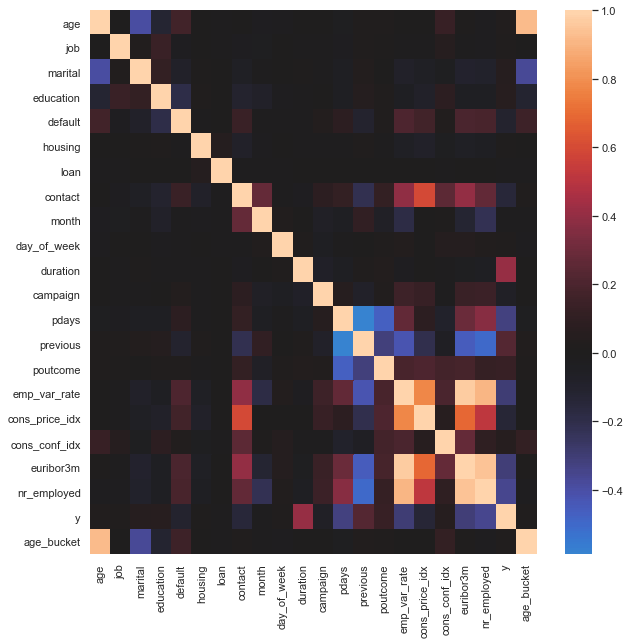

In [68]:
#define figure size
f = plt.figure(figsize=(10, 10))
#generate feature correlation plot
sns.heatmap(banklabel_df.corr(),center=0)



<b> EDA: Box-n-Whisker Plot</b><br>

<b> Outlier Detection and Handling</b>

A box-n-whisker plot has been created to perform a graphical outlier check on the dataset. Values shown as points outside the whiskers of the plot are considered outliers in the distribution. Features with obvious outliers are; age, duration, and pdays.<br>
<br>
Outlier Handling:
- Age contains outliers. Age is discretized and the non-discretized feature will be dropped in the next step. All values of age are realistic values and will remain in the dataset. (min age:17 max age:98).
- Duration contains outliers. Duration will be dropped from the dataset, as recommended by Moro et al.
- Pdays is the number of days since the last contact, where 999 is equal to no previous contact. In a dataset of around 41000 values, just shy of 40000 rows have a value of 999, making any other value seem like an outlier. It is common to set a value like 999 because a machine learning model will see and understand the large value is a different category. I will leave the 999 treatments in the dataset as the decision by Moro et al to include 999 for machine learning is fundamentally sound.

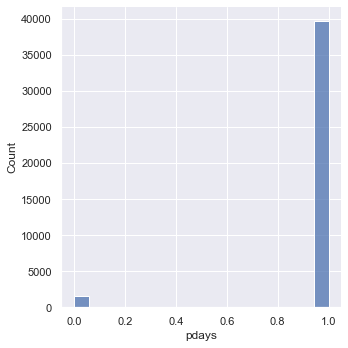

In [69]:
#show distribution of 'pdays'
sns.displot(data=bank_df,x='pdays')

<AxesSubplot:>

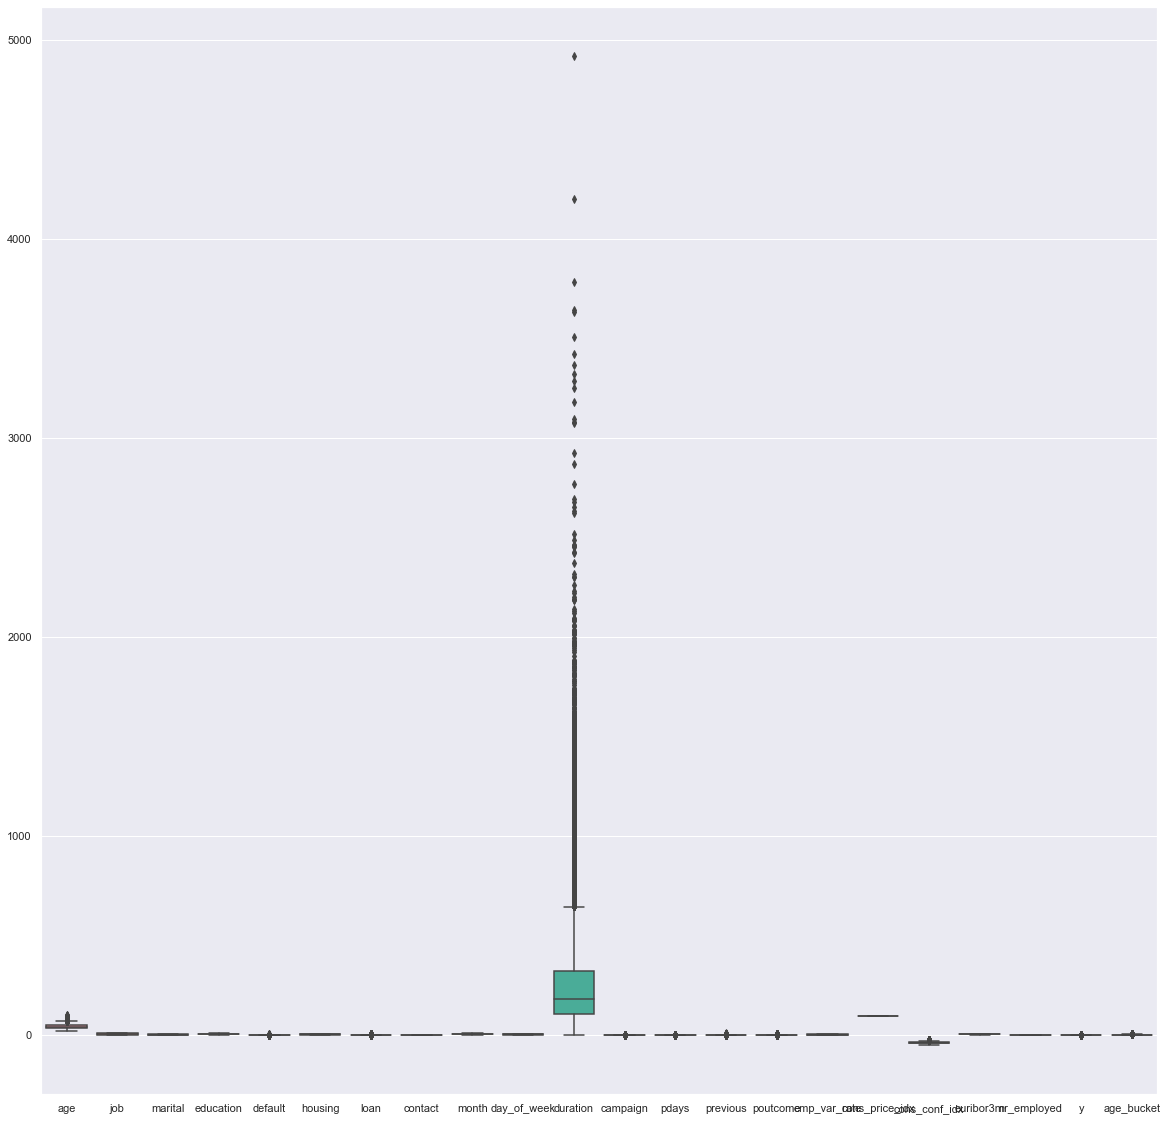

In [70]:
#define plot size
f = plt.figure(figsize=(20,20))
#create box n whisker plot
sns.boxplot(data=bank_df)


<b>Reduce Feature Set</b>

Features that do not show correlation to other features will be dropped from the dataset. These features are job, loan, housing, and day_of_week. These all have less than 0.01 correlation to the target variable "y", and show very little correlation to other features in the dataset. <br>
    
Age has been replaced by the discretized "age_bucket" categorical field. It is dropped as it is now a duplicate feature. 

Duration will also be dropped. Duration is the length of time a contact took with a customer. Moro et al recommend removing this feature from the dataset due to its strong correlation with "y". In the model, a duration of 0 always equals a “y” column value of "no". According to Moro et al, duration cannot be known before a call occurs, therefore, including it in a model skews predictions for future calls. They recommend removing this feature to create a more realistic model.


In [71]:
#drop low correlation columns
#job, loan, day_of_week
#create list of columns to drop
drop_cols = ['job','loan','housing','day_of_week','duration','age']

#drop non-functional columns
banklabel_df.drop(drop_cols,axis=1,inplace=True)

<b> Identify features and targets and train and test sets </b>

The final step in data preparation for machine learning is to identify the prediction variable and break the data into training and test sets.


In [72]:
##break data into features and targets
features = banklabel_df.drop('y', axis=1)
targets = banklabel_df['y']

##break data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2,random_state=77)

# Predict for "y"

The classification goal of this dataset is to predict if a client will subscribe for a bank account, as shown by variable "y" in the dataset. This classification goal makes a KNeighborsClassifier model an appropriate choice for predicting for "y". With no tuning, naively applied to the dataset, it achieves outstanding prediction scores; around 90% for both train and test sets. <br>
<br>
<b>KNeighborsClassifier() Scores</b><br>
Accuracy on train: 91.38% <br>
Accuracy on test: 89.32%<br>


In [73]:
#create model for KNN
basemodel = KNeighborsClassifier()

#fit model on training data
basemodel.fit(x_train, y_train)

KNeighborsClassifier()

In [74]:
#score classifier on training
basemodel.score(x_train, y_train)

0.9137784522003035

In [75]:
# score classifier on test
basemodel.score(x_test, y_test)

0.8931779558145181

<b>Requirement: How to improve model performance. </b>

It is possible to improve the performance of a model by tuning its hyperparameters. According to the program documentation there are two hyperparameters that have a significant effect on the performance of the model. These are n_neighbors and leaf_size. The n_neighbors parameter controls the number of neighbors. Models with smaller neighbor numbers have more flexible fits, while larger neighbor numbers result in smoother decision boundaries. Leaf_size effects the depth of the classification tree, with larger leaf sizes resulting in shorter trees. (Pedregosa et al, 2011) <br>



# Best Model By GridSearchCV (Brute Force Search):

<b>Requirement: Implement one of those methods to improve your KNN model performance. </b><br>
<b>Requirement: Rerun a KNN analysis for your improved dataset</b><br>
<b>Requirement: Discuss the change in performance from the model</b><br>

To optimize the hyperparameters, different combinations of neighbor numbers and leaf sizes must be tested. A brute force search for the best hyperparameter combination can be conducted using the GridSearchCV function in scikit learn. GridSearchCV will test specified hyperparameters across a defined range and return the model with the best performance. According to GridSearchCV the best model would use a leaf_size of 2 and a n_neighbor number of 20. Running the model with these parameters reduces the score on training data but boosts its performance on test, a smaller gap between training and test data with a higher score on test is an indication the accuracy of the model has improved with these new parameters. (Pedregosa et al, 2011)<br>
<br>
<b>GridSearchCV Model Accuracy:</b><br>
Accuracy on train: 90.19% <br>
Accuracy on test: 89.71%<br>


In [76]:
#grid search CV 
opt = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': (2, 20),'leaf_size': (2, 60)})
opt.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': (2, 60), 'n_neighbors': (2, 20)})

In [77]:
# call best estimator function
opt.best_estimator_

KNeighborsClassifier(leaf_size=2, n_neighbors=20)

In [78]:
#create optimized model
optmodel = KNeighborsClassifier(leaf_size=2, n_neighbors=20, n_jobs=-1)
optmodel.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=2, n_jobs=-1, n_neighbors=20)

In [79]:
#score classifier on training set
optmodel.score(x_train, y_train)

0.9018512898330804

In [80]:
# score classifier on test set
optmodel.score(x_test, y_test)

0.8971837824714737

# Best Model By Hand Tuning

The effect of the change in the n_neighbors hyperparameter can be visualized on a graph. The code for these graphs has been adapted from this week’s MSDS650 lesson. <br>



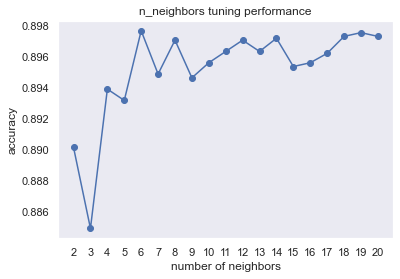

In [81]:
scores = []

# remember the ending number for range is not inclusive
for k in range(2, 21):
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1, algorithm = 'kd_tree')
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
    
# display the resutls
plt.plot(range(2, 21), scores)
plt.scatter(range(2, 21), scores)
plt.title('n_neighbors tuning performance')
plt.ylabel('accuracy')
plt.xlabel('number of neighbors')
plt.grid()
_ =plt.xticks(range(2, 21))

<b> Requirement: What is your optimal K </b>

Optimal K = 6<br>

In the chart, the n_neighbors number appears to have a dramatic effect on the accuracy of the model. However, it should be noted that tuning between 2 to 20 neighbors only changes the accuracy over a range of about 1%. The leaf_size hyperparameter has an even smaller impact, shown below. Tuning between leaf_sizes has less than 0.001% difference on the performance of the model. Based on a visual inspection of the graph, I will choose an optimal neighbor size of 6. While larger neighbor numbers do show similar performance, smaller numbers prevent overfitting and should boost the model’s performance on test data sets. Leaf_size does not have a significant impact on the model’s performance so it will be left at its default value leaf_size=30. <br>
<br>
<b>Hand Made Model Accuracy:</b><br>	
Accuracy on train using hand tuned model: 91.09%<br>
Accuracy on test using hand tuned model: 89.77%<br>

It appears my custom hand tuned model is outperforming the GridSearchCV model! However, I don’t think the 1% increased performance is significant. I believe for the prediction of bank account sign ups it is meaningless. That being said, if a model could be designed that outperformed the stock market by 1% it would be very valuable.


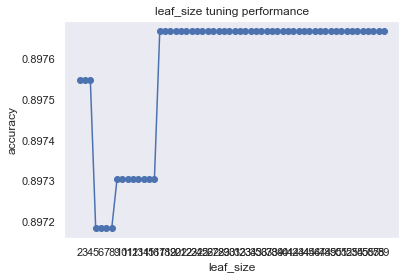

In [82]:
scores = []

# remember the ending number for range is not inclusive
for k in range(2, 60):
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=6, leaf_size=k, n_jobs=-1)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
    
# display the resutls
plt.plot(range(2, 60), scores)
plt.scatter(range(2, 60), scores)
plt.grid()
plt.title('leaf_size tuning performance')
plt.ylabel('accuracy')
plt.xlabel('leaf_size')
_ =plt.xticks(range(2, 60))

In [83]:
#create model using hand crafted specifications
handmodel = KNeighborsClassifier(n_neighbors=6, n_jobs=-1)
#fit model to training set
handmodel.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

In [84]:
#score classifier on training set
handmodel.score(x_train, y_train)

0.910804248861912

In [85]:
# score classifier on test set
handmodel.score(x_test, y_test)

0.8976693372177713


## K-Fold Cross-Validation

<b>Requirement: Complete a K-fold cross-validation analysis for your improved model</b>


The performance of the KNeighbors Classifier can be compared to other popular classification algorithms using a K-Fold Cross-Validation. A K-Fold Cross-Validation compares models by testing them on random samples of the data multiple times. It then returns the results of these trials for comparison. The results of a k-fold cross-validation can be displayed in a graphical format to show the performance of the models as shown below. The code to create this was adapted from this week’s MSDS650 required reading. <br>


In [86]:
#create list for models
models = []
models.append(('ADA', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=6, n_jobs=-1)))

#define parameters for kfold
num_folds = 10
seed = 42
scoring = 'accuracy'

In [87]:
#creatre lists for results and names
results = []
names = []

#iterate through models
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ADA: 0.899605 (0.004493)
GBC: 0.901275 (0.004294)
RFC: 0.885706 (0.004093)
ETC: 0.883429 (0.005219)
KNN: 0.894112 (0.003499)


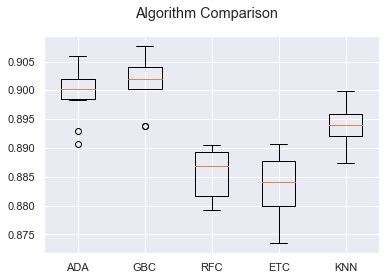

In [88]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

<b>Requirement: Discuss the difference in the performance of the 4 algorithms against your improved dataset.</b>

The highest performing algorithm by K-Fold Cross Validation is the gradient boosting classifier, without hyper parameter tuning, it is achieving an average prediction accuracy of 90.13%. It is followed closely by an ADA boost model. Both of these models are advanced learning algorithms that improve performance by adjusting the weights of "weak learners" to improve performance. These advanced models both outperform the KNeighbors Classifier, which lands in third place on the chart. In last place are the random forest and extra trees classifiers. The random forest and extra trees classifiers both work by generating forests of decision trees. These models are less advanced and are typically outperformed, as shown in the graph above. <br>

The first metric for model comparison is against the no-information rate. The no-information rate is the accuracy rate that would occur if the largest class in the data was applied to all of the information. In the bank data set, the largest class is no, which applies to 36,548 out of 41,188 rows, or 88.72% of the data. If we simply guessed no for all bank customers, we would be correct 88.72% of the time. (Lipinski, 2017)  <br>

Comparison of Models vs No-Information Rate:
- Gradient Boosting is 1.41% ahead of the no information rate.
- ADA Boost is 1.24% ahead of the no information rate.
- KNeighbors is 0.69% ahead of the no information rate.
- Random Forest is 0.1% behind the no information rate.
- Extra Trees is 0.42% behind the no information rate.

Unfortunately, the models fall very close to the performance of the no-information rate, under a 5% significance threshold, they may be worthless. However, the objective was to predict if a customer will sign up for a bank account. To really understand this, and how to implement the model, other metrics must be used. The measurements of precision and specificity can help define how often a model predicts what type of correct results (true positives vs true negatives). These two metrics will be investigated for the highest performing gradient boosting model.

- The GB model guessed yes 988 times and was only correct 211 times, for a precision around 23.47%. 
- The GB model guessed no 7,369 times and was correct 7,246 times, for a specificity around 98.22%.

<b> How to use this model. </b>

With an accuracy only slightly ahead of the no-information rate, and a precision of 23%, we need to be very creative with how this model is deployed to make it useful. The outstanding specificity of 98% means it is adept at filtering out customers who won’t sign up for accounts. I would recommend the campaign only contact customers identified as positives by the model. This will drastically reduce the number of phone calls they need to make to achieve the same number of account signups. With this model, they could have avoided 7000+ rejection calls and focused energy on customers who would have had a higher likelihood of saying yes. This type of strategy would have a huge impact if they had millions of customers to contact. A confusion matrix, plotted below, visualizes these results.


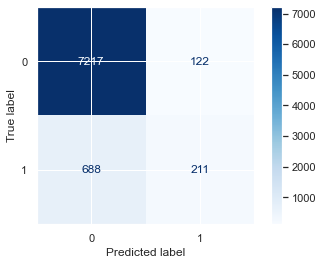

In [89]:
#create gradient boosting model
gb_model = GradientBoostingClassifier()
#fit model to training data
gb_model.fit(x_train, y_train)
#show modle performance on test
plot_confusion_matrix(gb_model, x_test, y_test, cmap='Blues')

# References

Browlee, Jason PhD. 2019. <i>How to use Data Scaling Improve Deep Learning Model Stability and Performance.</i> retreived from MachineLearningMastery.com https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

Browlee, Jason PhD. 2020. <i>Ordinal and One-Hot Encodings for Categorical Data.</i> retreived from MachineLearningMastery.com https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

Lipinski, John. 2017 <i>How to Asses Model Accuracy the Basics</i>. retreived from HRAnalytics101.com. https://www.hranalytics101.com/how-to-assess-model-accuracy-the-basics/

S. Moro,. P. Cortez and P. Rita. <i>A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems,</i> In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

<i>Scikit-learn: Machine Learning in Python,<i> P/edregosa et al., JMLR 12, pp. 2825-2830, 2011.

The pandas development team. 2020. <i>pandas-dev/pandas: Pandas.</i> published by Zendo. https://doi.org/10.5281/zenodo.3509134
 
